In [1]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from scipy.stats import entropy
import torch
from torch.utils.data import DataLoader, TensorDataset

In [33]:
pkl_path = '../logs_topk_sae/new_initialized_sae.pkl'

In [34]:
with open(pkl_path, "rb") as f:
    all_results = pickle.load(f)

pure_digit_coverage = {}

for sae_name, results in all_results.items():
    auc_matrix = results["auc_matrix"]
    neuron_df = results["per_neuron_df"]
    
    count_per_neuron = (auc_matrix > 0.95).sum(axis=1)
    
    pure_neurons = count_per_neuron[count_per_neuron == 1].index
    
    digits_represented = neuron_df.loc[pure_neurons, "best_digit"]
    
    digit_counts = digits_represented.value_counts().sort_index()
    
    pure_digit_coverage[sae_name] = {
        "n_digits_represented": digit_counts.count(),
        "digit_counts": digit_counts.to_dict()
    }

for sae, info in pure_digit_coverage.items():
    print(f"\n{sae}:")
    print(f"  Unique digits with ≥1 pure neuron: {info['n_digits_represented']}")
    print(f"  Digit breakdown: {info['digit_counts']}")




reanim_topk_sae_256_25_best_loss:
  Unique digits with ≥1 pure neuron: 4
  Digit breakdown: {0: 1, 1: 1, 4: 3, 7: 2}

topk_sae_256_5_best_loss:
  Unique digits with ≥1 pure neuron: 5
  Digit breakdown: {0: 1, 1: 1, 2: 1, 3: 1, 6: 1}

reanim_topk_sae_512_25_best_loss:
  Unique digits with ≥1 pure neuron: 5
  Digit breakdown: {0: 1, 1: 3, 5: 1, 6: 2, 7: 1}

topk_sae_512_384_best_loss:
  Unique digits with ≥1 pure neuron: 9
  Digit breakdown: {0: 15, 1: 39, 2: 2, 3: 1, 4: 6, 5: 4, 6: 14, 7: 4, 8: 1}

reanim_topk_sae_512_256_best_loss:
  Unique digits with ≥1 pure neuron: 7
  Digit breakdown: {0: 11, 1: 52, 2: 1, 4: 2, 5: 4, 6: 1, 7: 5}

topk_sae_256_128_best_loss:
  Unique digits with ≥1 pure neuron: 8
  Digit breakdown: {0: 6, 1: 13, 2: 1, 3: 1, 4: 4, 5: 3, 6: 4, 7: 2}

topk_sae_256_51_best_loss:
  Unique digits with ≥1 pure neuron: 7
  Digit breakdown: {0: 4, 1: 6, 2: 3, 4: 1, 5: 1, 6: 1, 7: 1}

topk_sae_512_486_best_loss:
  Unique digits with ≥1 pure neuron: 9
  Digit breakdown: {0: 1

In [6]:
all_results.keys()

dict_keys(['reanim_topk_sae_256_25_best_loss', 'topk_sae_256_5_best_loss', 'reanim_topk_sae_512_25_best_loss', 'topk_sae_512_384_best_loss', 'reanim_topk_sae_512_256_best_loss', 'topk_sae_256_128_best_loss', 'topk_sae_256_51_best_loss', 'topk_sae_512_486_best_loss', 'reanim_topk_sae_512_384_best_loss', 'topk_sae_512_256_best_loss', 'reanim_topk_sae_512_486_best_loss', 'reanim_topk_sae_256_128_best_loss', 'reanim_topk_sae_256_5_best_loss', 'reanim_topk_sae_256_51_best_loss', 'topk_sae_256_243_best_loss', 'topk_sae_512_51_best_loss', 'topk_sae_256_12_best_loss', 'reanim_topk_sae_512_102_best_loss', 'reanim_topk_sae_512_51_best_loss', 'topk_sae_512_102_best_loss', 'reanim_topk_sae_512_10_best_loss', 'topk_sae_512_10_best_loss', 'topk_sae_256_25_best_loss', 'topk_sae_256_192_best_loss', 'reanim_topk_sae_256_192_best_loss', 'reanim_topk_sae_256_243_best_loss', 'reanim_topk_sae_256_12_best_loss', 'topk_sae_512_25_best_loss'])

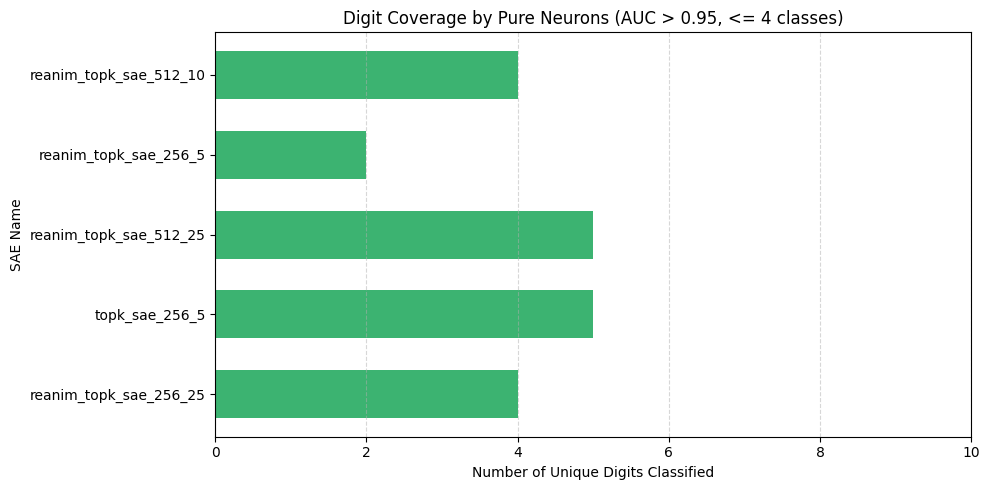

In [8]:
with open(pkl_path, "rb") as f:
    all_results = pickle.load(f)

sae_digit_counts = {}

for sae_name, results in all_results.items():
    
    auc_matrix = results["auc_matrix"]
    neuron_df = results["per_neuron_df"]

    count_per_neuron = (auc_matrix > 0.95).sum(axis=1)

    pure_neurons = count_per_neuron[count_per_neuron == 1].index

    digits_represented = neuron_df.loc[pure_neurons, "best_digit"]

    if digits_represented.nunique() <= 5:
        grouped_name = sae_name.split("_best")[0]
        sae_digit_counts[grouped_name] = digits_represented.nunique()

plt.figure(figsize=(10, 5))
plt.barh(list(sae_digit_counts.keys()), list(sae_digit_counts.values()), color="mediumseagreen", height=0.6)
plt.xlabel("Number of Unique Digits Classified")
plt.ylabel("SAE Name")
plt.title(f"Digit Coverage by Pure Neurons (AUC > 0.95, <= 4 classes)")
plt.xlim(0, 10)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.subplots_adjust(left=0.2)  
plt.tight_layout()
plt.show()

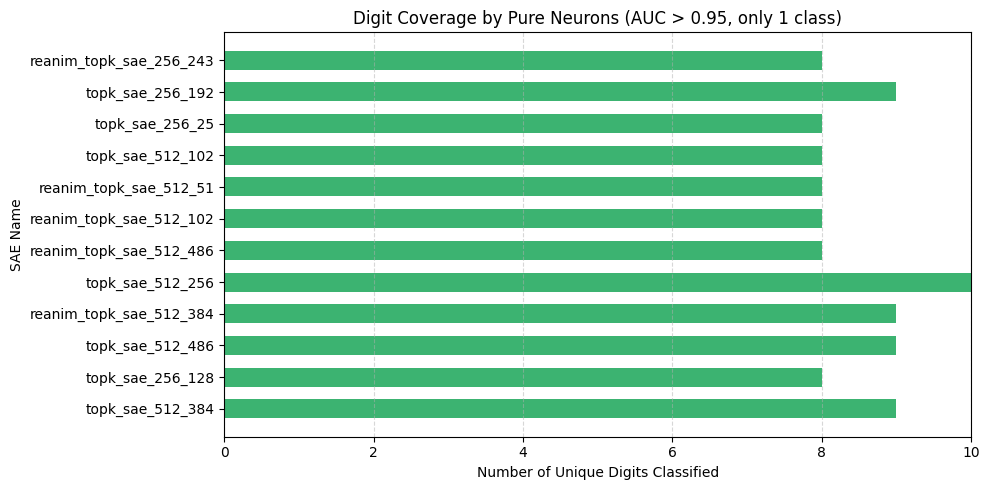

In [10]:
with open(pkl_path, "rb") as f:
    all_results = pickle.load(f)

sae_digit_counts = {}

for sae_name, results in all_results.items():
    
    auc_matrix = results["auc_matrix"]
    neuron_df = results["per_neuron_df"]

    count_per_neuron = (auc_matrix > 0.95).sum(axis=1)

    pure_neurons = count_per_neuron[count_per_neuron == 1].index

    digits_represented = neuron_df.loc[pure_neurons, "best_digit"]

    if digits_represented.nunique() >= 8:
        grouped_name = sae_name.split("_best")[0]
        sae_digit_counts[grouped_name] = digits_represented.nunique()

plt.figure(figsize=(10, 5))
plt.barh(list(sae_digit_counts.keys()), list(sae_digit_counts.values()), color="mediumseagreen", height=0.6)
plt.xlabel("Number of Unique Digits Classified")
plt.ylabel("SAE Name")
plt.title(f"Digit Coverage by Pure Neurons (AUC > 0.95, only 1 class)")
plt.xlim(0, 10)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.subplots_adjust(left=0.2)  
plt.tight_layout()
plt.show()

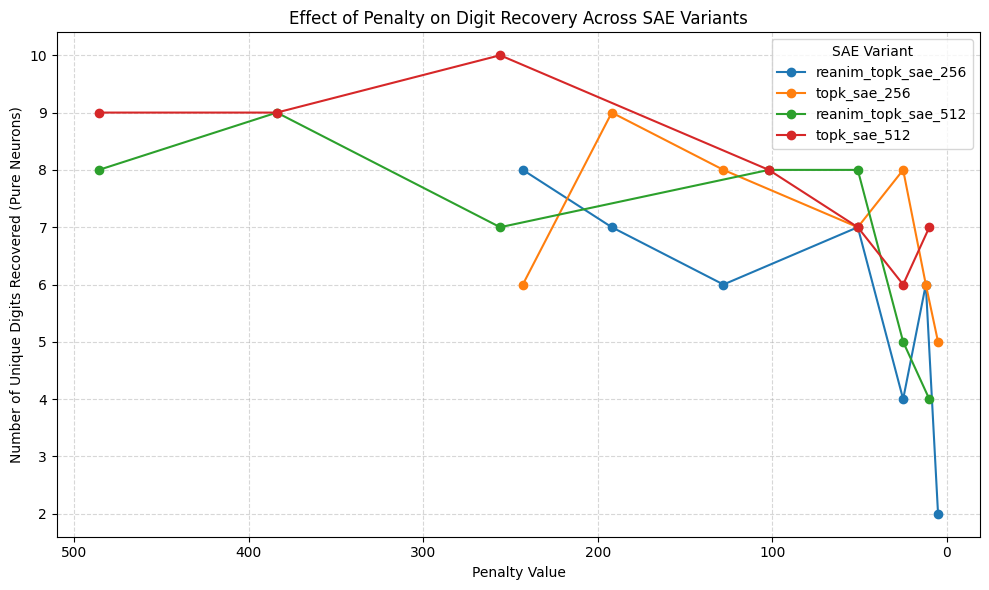

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import defaultdict
from scipy.interpolate import make_interp_spline  # smooth curves

grouped_digit_counts = defaultdict(dict)

# Step 1: Parse and group
for sae_name, results in all_results.items():
    if "auc_matrix" not in results or "per_neuron_df" not in results:
        continue

    # Clean up sae_name
    sae_name = sae_name.split('_best_loss')[0]

    try:
        penalty = float(sae_name.split('_')[-1])
        variant = "_".join(sae_name.split('_')[:-1])
    except ValueError:
        continue

    auc_matrix = results["auc_matrix"]
    neuron_df = results["per_neuron_df"]
    count_per_neuron = (auc_matrix > 0.95).sum(axis=1)
    pure_neurons = count_per_neuron[count_per_neuron == 1].index
    digits_represented = neuron_df.loc[pure_neurons, "best_digit"]

    grouped_digit_counts[variant][penalty] = digits_represented.nunique()

# Step 2: Plot
plt.figure(figsize=(10, 6))

for variant, penalty_dict in grouped_digit_counts.items():
    penalties = sorted(penalty_dict.keys())
    digits = [penalty_dict[p] for p in penalties]

    # # Smooth curve using cubic spline (only if more than 3 points)
    # if len(penalties) > 3:
    #     penalties_np = np.array(penalties)
    #     digits_np = np.array(digits)
    #     spline = make_interp_spline(penalties_np, digits_np, k=3)  # cubic
    #     x_smooth = np.linspace(min(penalties_np), max(penalties_np), 200)
    #     y_smooth = spline(x_smooth)
    #     plt.plot(x_smooth, y_smooth, label=variant)
    # else:
    #     # Not enough points to smooth — plot raw
    plt.plot(penalties, digits, marker='o', label=variant)

plt.xlabel("Penalty Value")
plt.ylabel("Number of Unique Digits Recovered (Pure Neurons)")
plt.title("Effect of Penalty on Digit Recovery Across SAE Variants")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="SAE Variant")
plt.tight_layout()

# Reverse the X-axis direction
plt.gca().invert_xaxis()

plt.show()

[243 192 128  51  25  12   5]
[243 192 128  51  25  12   5]
[486 384 256 102  51  25  10]
[486 384 256 102  51  25  10]


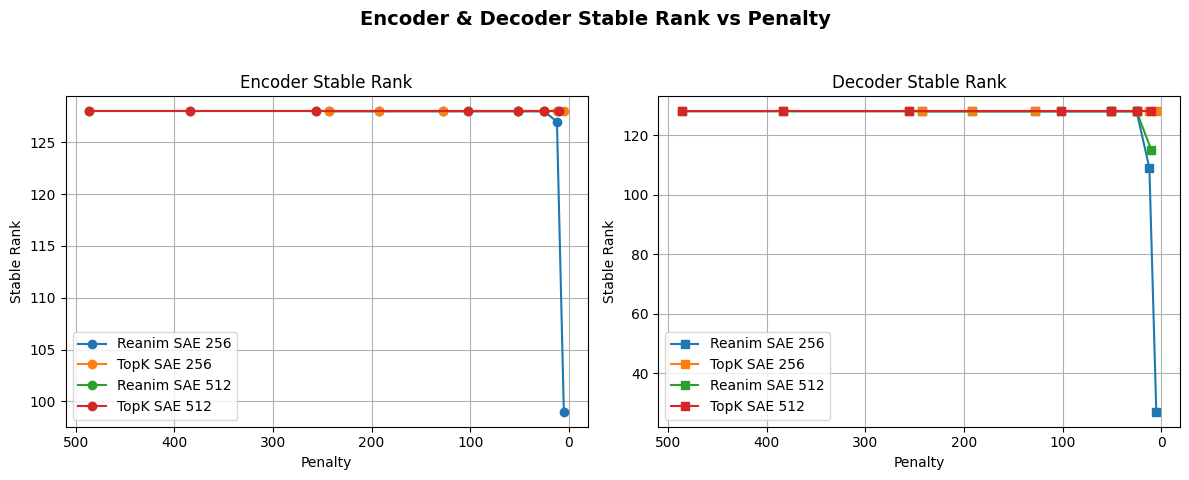

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker

def parse_sae_name(sae_name):
    name = sae_name.replace('_best_loss', '')
    has_reanim = name.startswith('reanim_')
    if has_reanim:
        name = name[7:]
    parts = name.split('_')
    if len(parts) >= 4 and parts[0] == 'topk' and parts[1] == 'sae':
        try:
            dict_size = int(parts[2])
            penalty = int(parts[3])
            return has_reanim, dict_size, penalty
        except ValueError:
            pass
    return has_reanim, None, None

def plot_encoder_decoder_stable_rank(all_stable_rank_results, figsize=(12, 5)):


    fig, axes = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('Encoder & Decoder Stable Rank vs Penalty', fontsize=14, fontweight='bold')

    grouped_data = {}

    for sae_name, sae_results in all_stable_rank_results.items():
        has_reanim, dict_size, penalty = parse_sae_name(sae_name)
        if dict_size is None or penalty is None:
            continue
        key = (has_reanim, dict_size)
        if key not in grouped_data:
            grouped_data[key] = {'penalties': [], 'enc_ranks': [], 'dec_ranks': []}

        threshold = 0.1
        enc_rank = sae_results.get('encoder_analysis', {}).get('threshold_0.1').get('stable_rank')
        dec_rank = sae_results.get('decoder_analysis', {}).get('threshold_0.1').get('stable_rank')

        if enc_rank is not None and dec_rank is not None:
            grouped_data[key]['penalties'].append(penalty)
            grouped_data[key]['enc_ranks'].append(enc_rank)
            grouped_data[key]['dec_ranks'].append(dec_rank)


    for (has_reanim, dict_size), data in grouped_data.items():
        penalties = np.array(data['penalties'])
        enc_ranks = np.array(data['enc_ranks'])
        dec_ranks = np.array(data['dec_ranks'])

        sort_idx = np.argsort(-penalties)
        penalties = penalties[sort_idx]
        enc_ranks = enc_ranks[sort_idx]
        dec_ranks = dec_ranks[sort_idx]

        
        print(penalties)

        label = f"{'Reanim' if has_reanim else 'TopK'} SAE {dict_size}"

        axes[0].plot(penalties, enc_ranks, marker='o', label=label)
        axes[1].plot(penalties, dec_ranks, marker='s', label=label)

    axes[0].set_title("Encoder Stable Rank")
    axes[1].set_title("Decoder Stable Rank")

    for ax in axes:
        ax.set_xlabel("Penalty")
        ax.set_ylabel("Stable Rank")
        ax.grid(True)
        ax.legend()
        ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))
        ax.invert_xaxis()
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])

with open('../logs_topk_sae/stable_rank_results.pkl', 'rb') as f: 
    data = pickle.load(f)
    
plot_encoder_decoder_stable_rank(data)


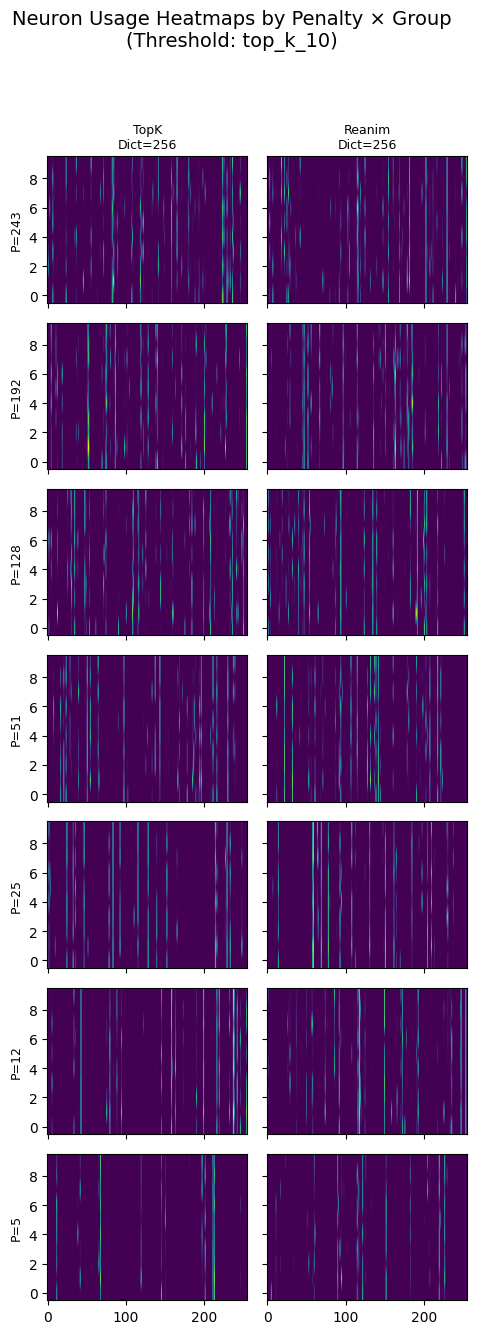

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

def parse_sae_name(sae_name):
    name = sae_name.replace('_best_loss', '')
    has_reanim = name.startswith('reanim_')
    if has_reanim:
        name = name[7:]
    parts = name.split('_')
    if len(parts) >= 4 and parts[0] == 'topk' and parts[1] == 'sae':
        try:
            dict_size = int(parts[2])
            penalty = int(parts[3])
            return has_reanim, dict_size, penalty
        except ValueError:
            pass
    return has_reanim, None, None

def get_available_penalties(all_concept_paths, groups, thresh_type='top_k_10'):
    penalties_set = set()
    for sae_name, results_by_thresh in all_concept_paths.items():
        has_reanim, dict_size, penalty = parse_sae_name(sae_name)
        if (has_reanim, dict_size) in groups and thresh_type in results_by_thresh:
            penalties_set.add(penalty)
    return sorted(penalties_set, reverse=True) 

def plot_penalty_group_grid(all_concept_paths, groups, thresh_type='top_k_10', neuron_limit=256):
    penalties = get_available_penalties(all_concept_paths, groups, thresh_type)
    num_penalties = len(penalties)
    num_groups = len(groups)

    fig, axes = plt.subplots(num_penalties, num_groups, figsize=(2.5 * num_groups, 2 * num_penalties), sharex=True, sharey=True)

    if num_penalties == 1:
        axes = np.expand_dims(axes, axis=0)
    if num_groups == 1:
        axes = np.expand_dims(axes, axis=1)

    for row_idx, penalty in enumerate(penalties):
        for col_idx, (has_reanim, dict_size) in enumerate(groups):
            ax = axes[row_idx][col_idx]
            neuron_digit_matrix = np.zeros((10, neuron_limit))

            # Match the correct SAE key
            for sae_name in all_concept_paths.keys():
                r, d, p = parse_sae_name(sae_name)
                if (r == has_reanim and d == dict_size and p == penalty):
                    if thresh_type not in all_concept_paths[sae_name]:
                        continue
                    data = all_concept_paths[sae_name][thresh_type]['concept_paths']
                    for item in data:
                        digit = item['label']
                        for neuron in item['active_neurons']:
                            if neuron < neuron_limit:
                                neuron_digit_matrix[digit][neuron] += 1
                    break

            im = ax.imshow(neuron_digit_matrix, aspect='auto', cmap='viridis', origin='lower')
            if row_idx == 0:
                reanim_label = "Reanim" if has_reanim else "TopK"
                ax.set_title(f"{reanim_label}\nDict={dict_size}", fontsize=9)
            if col_idx == 0:
                ax.set_ylabel(f"P={penalty}", fontsize=9)

    fig.suptitle(f"Neuron Usage Heatmaps by Penalty × Group\n(Threshold: {thresh_type})", fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

groups = [(False, 256), (True, 256)]
plot_penalty_group_grid(all_concept_paths, groups, thresh_type='top_k_10')

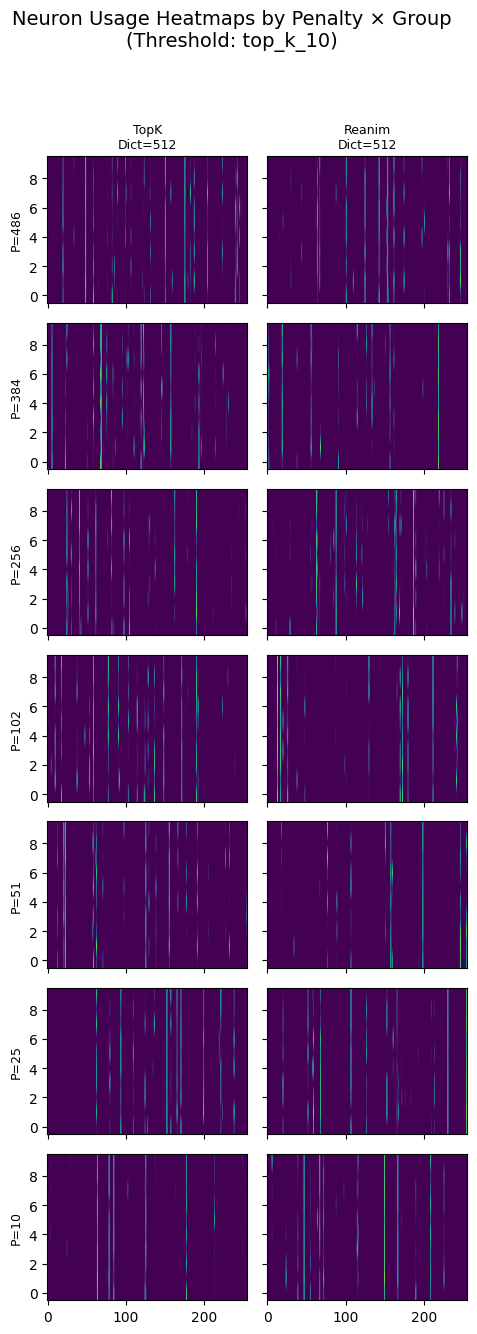

In [22]:
groups = [(False, 512), (True, 512)]
plot_penalty_group_grid(all_concept_paths, groups, thresh_type='top_k_10')

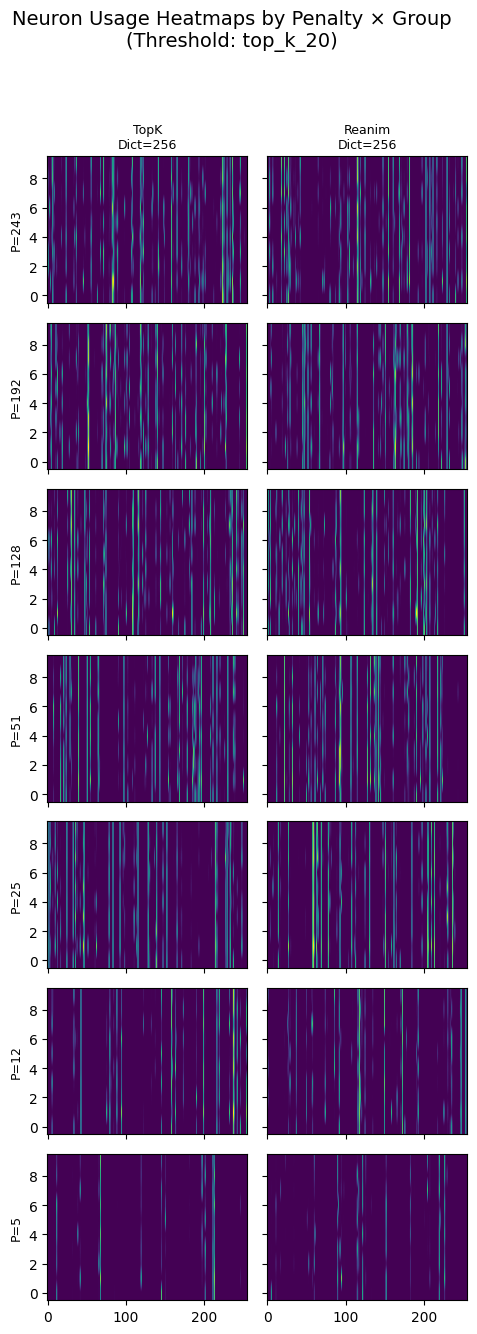

In [23]:
groups = [(False, 256), (True, 256)]
plot_penalty_group_grid(all_concept_paths, groups, thresh_type='top_k_20')

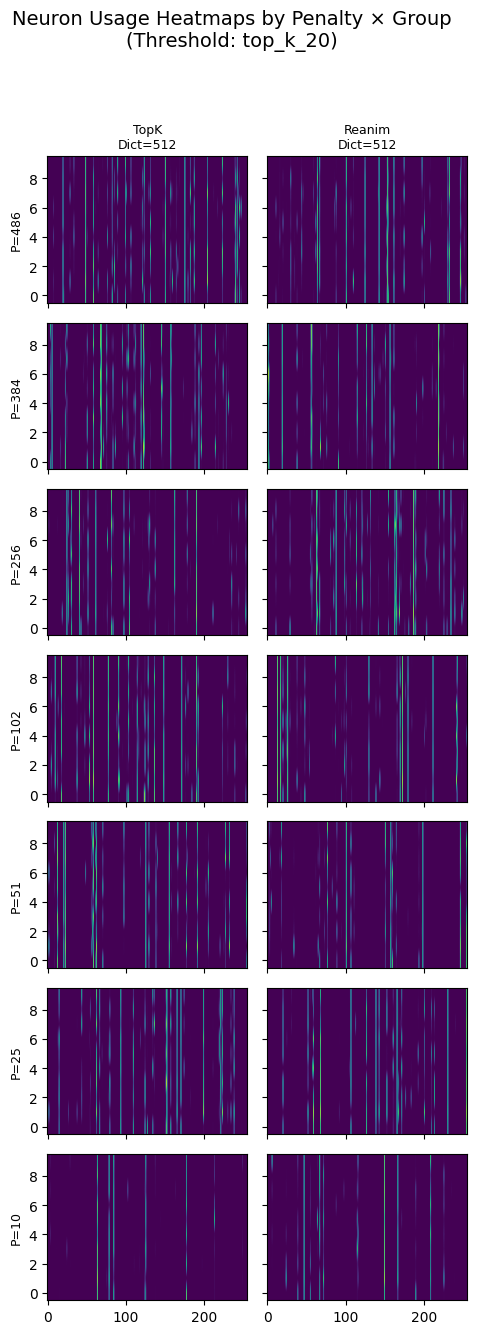

In [24]:
groups = [(False, 512), (True, 512)]
plot_penalty_group_grid(all_concept_paths, groups, thresh_type='top_k_20')

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

def parse_sae_name(sae_name):
    name = sae_name.replace('_best_loss', '')
    has_reanim = name.startswith('reanim_')
    if has_reanim:
        name = name[7:]
    parts = name.split('_')
    if len(parts) >= 4 and parts[0] == 'topk' and parts[1] == 'sae':
        try:
            dict_size = int(parts[2])
            penalty = int(parts[3])
            return has_reanim, dict_size, penalty
        except ValueError:
            pass
    return has_reanim, None, None

def plot_jaccard_by_penalty(all_concept_paths, thresh_type='top_k_10'):
    grouped_scores = defaultdict(lambda: {'penalties': [], 'scores': []})

    for sae_name, results_by_thresh in all_concept_paths.items():
        has_reanim, dict_size, penalty = parse_sae_name(sae_name)
        if dict_size is None or penalty is None:
            continue
        if thresh_type not in results_by_thresh:
            continue
        data = results_by_thresh[thresh_type]
        
        if 'overlap_analysis' in data:
            score = data['overlap_analysis']['summary']['mean_jaccard']

            key = (has_reanim, dict_size)
            grouped_scores[key]['penalties'].append(penalty)
            grouped_scores[key]['scores'].append(score)

    plt.figure(figsize=(10, 6))
    for (has_reanim, dict_size), values in grouped_scores.items():
        penalties = np.array(values['penalties'])
        scores = np.array(values['scores'])

        # Sort by penalty in descending order
        sort_idx = np.argsort(-penalties)
        penalties = penalties[sort_idx]
        scores = scores[sort_idx]

        label = f"{'Reanim' if has_reanim else 'Vanilla'} SAE {dict_size}"
        plt.plot(penalties, scores, marker='o', label=label)

    plt.title("Mean Jaccard Score vs Penalty")
    plt.xlabel("Penalty")
    plt.ylabel("Mean Jaccard Score")
    plt.grid(True)
    plt.legend()
    plt.gca().invert_xaxis()
    plt.tight_layout()
    plt.show()

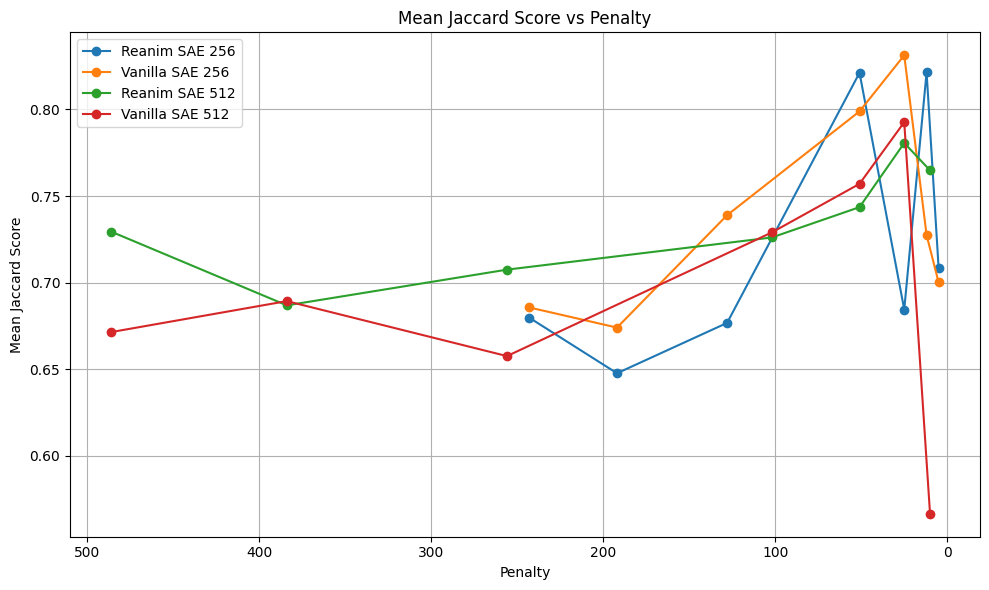

In [30]:
plot_jaccard_by_penalty(all_concept_paths, thresh_type='top_k_10')

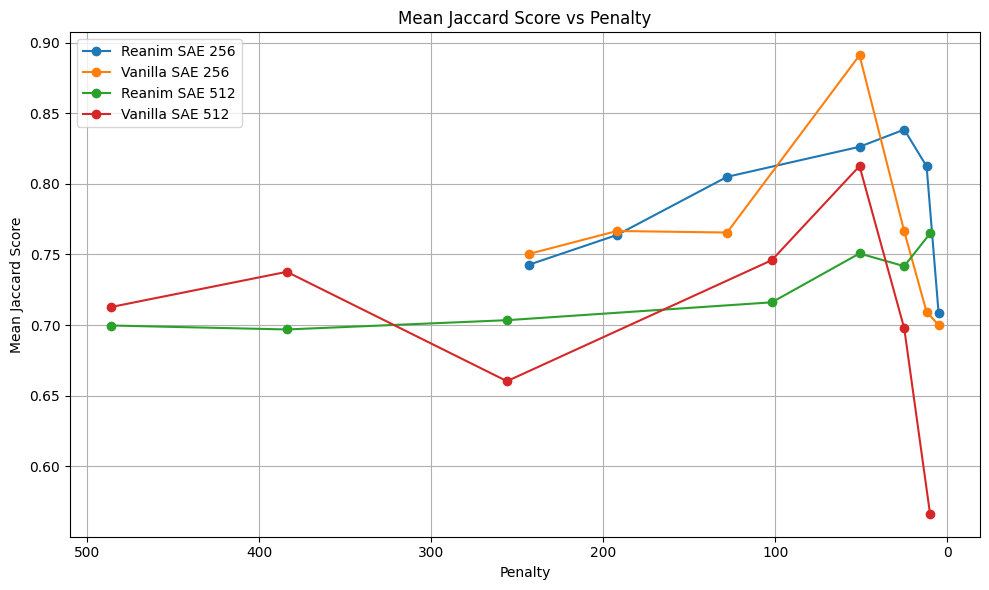

In [31]:
plot_jaccard_by_penalty(all_concept_paths, thresh_type='top_k_20')